In [111]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from api_key_container import api_key

In [156]:
url = "https://api.marketstack.com/v1/tickers?access_key=" + api_key
response = requests.get(url)
response_json = response.json()
# print(response_json)

In [157]:
companies = response_json['data']

In [158]:
df = pd.json_normalize(companies, meta=['name'])
# print(df)

In [159]:
url = "https://api.marketstack.com/v1/splits?access_key=" + api_key
querystring = {"symbols":"MSFT"}
response = requests.get(url, params=querystring)
# print(response.json())

In [160]:
url = "https://api.marketstack.com/v1/eod?access_key=" + api_key
querystring = {"symbols":"MSFT","date_from":"2023-12-19", "date_to":"2024-12-19"}
response = requests.get(url, params=querystring)
# print(response.json())

In [161]:
historical_data = response.json()['data']
# historical_data

In [162]:
df = pd.json_normalize(historical_data, meta=['date'])
# df

In [163]:
df['date'] = pd.to_datetime(df['date'])
# df

In [164]:
monthly = df.groupby(pd.Grouper(key='date', freq='M')).mean() 
# monthly

In [165]:
weekly = df.groupby(pd.Grouper(key='date', freq='W')).mean() 
# weekly

In [166]:
def shorten_date(date):
    return date[0:10]

# df['date']
# df['short_date'] = df['date'].apply(shorten_date)
# df

In [167]:
# df.plot('short_date', 'volume', kind='bar')

In [168]:
# weekly.plot.bar(y='adj_close')

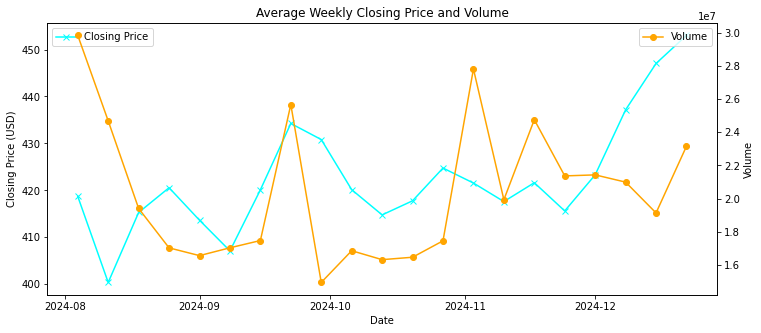

In [169]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Average Weekly Closing Price and Volume')
ax.set_xlabel('Date')
plt.xticks(rotation=90)
plt.plot(kind='bar')
# ax.xticks(rotation=90)
# ax.plot(kind='bar')
ax.plot(weekly['adj_close'], label='Closing Price', color='cyan', marker='x')
# ax = df.plot('short_date', 'adj_close', kind='bar')
ax2.plot(weekly['volume'], label='Volume', color='orange', marker='o')
ax.set_ylabel('Closing Price (USD)')
ax2.set_ylabel('Volume')
# plt.xticks(rotation=90)
# plt.legend()
ax.legend(loc='upper left')
ax2.legend()
plt.show()

numbers:
    highest volume
    lowest volume
    highest price
    lowest price
    
over time:
    closing versus opening
    volume
    
averages (over different periods):
    volume
    high
    low
    closing
last week
last month

In [170]:
# df

In [171]:
# highest_volume = round(df['volume'].max(), 0)
# highest_volume

# df['volume'].max()
print('Highest Volume')
int(df['volume'].max())

Highest Volume


55155300

In [172]:
# df[['volume', 'short_date']].sort_values('volume', ascending=False)

In [173]:
print('Lowest Volume')
int(df['volume'].min())

Lowest Volume


13134700

In [174]:
# df[['volume', 'short_date']].sort_values('volume', ascending=True).head(1)

In [175]:
# df[['adj_high', 'short_date']].sort_values('adj_high', ascending=False)

In [177]:
print('Highest Adjusted Price')
round(df['adj_high'].max(), 2)

Highest Adjusted Price


456.16

In [178]:
# df[['adj_high', 'short_date']].sort_values('adj_high', ascending=True).head(1)

In [179]:
print('Lowest Adjusted Price')
df['adj_low'].min()

Lowest Adjusted Price


385.58

In [180]:
# df.plot.line('short_date', y=['adj_open', 'adj_close'])
# plt.xticks(rotation=90)
# plt.xlabel('Date')
# plt.ylabel('Adjusted Price (USD)')
# plt.title('Microsoft EOD Data')
# plt.legend(labels=['Adjusted Opening Price', 'Adjusted Closing Price'])

In [95]:
df['volume'].mean()

20284888.0

In [96]:
df['adj_high'].mean()

425.37820500000015

In [97]:
df['adj_low'].mean()

417.9611310000001

In [98]:
df['adj_close'].mean()

421.5292

In [144]:
# df2 = df.set_index('date')
# df2

,open,high,low,close,volume,adj_high,adj_low,adj_close,adj_open,adj_volume,split_factor,dividend,symbol,exchange
date,,,,,,,,,,,,,,
2024-11-29 00:00:00+00:00,420.090,424.8800,417.80,423.46,16271900.0,424.8800,417.800,423.46,420.090,16271921.0,1.0,0.0,MSFT,XNAS
2024-11-27 00:00:00+00:00,425.105,427.2299,422.02,422.99,18332444.0,427.2299,422.020,422.99,425.105,18332444.0,1.0,0.0,MSFT,XNAS
2024-11-26 00:00:00+00:00,419.590,429.0400,418.85,427.99,23439600.0,429.0414,418.850,427.99,419.585,23458889.0,1.0,0.0,MSFT,XNAS
2024-11-25 00:00:00+00:00,418.380,421.0800,414.85,418.79,27651300.0,421.0800,414.850,418.79,418.380,27691090.0,1.0,0.0,MSFT,XNAS
2024-11-22 00:00:00+00:00,411.370,417.4000,411.06,417.00,24802100.0,417.4000,411.060,417.00,411.365,24814626.0,1.0,0.0,MSFT,XNAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-17 00:00:00+00:00,442.430,444.8500,439.18,443.52,21741478.0,444.8500,439.180,443.52,442.590,21754021.0,1.0,0.0,MSFT,XNAS
2024-07-16 00:00:00+00:00,454.220,454.3000,446.66,449.52,17038389.0,454.3000,446.660,449.52,454.220,17175679.0,1.0,0.0,MSFT,XNAS
2024-07-15 00:00:00+00:00,453.420,457.2600,451.43,453.96,13621481.0,457.2600,451.430,453.96,453.300,14429447.0,1.0,0.0,MSFT,XNAS


In [189]:
print('Last Week')

Last Week


In [191]:
print('Average Volume')

Average Volume


In [190]:
df_last_week = df.loc[df['date'].between('2024-12-11','2024-12-17', inclusive=True)]
# df_last_week
int(df_last_week['volume'].mean())

20875650

In [192]:
print('Highest Price')

Highest Price


In [194]:
round(df_last_week['adj_high'].max(), 2)

456.16

In [195]:
print('Lowest Price')

Lowest Price


In [196]:
round(df_last_week['adj_low'].min(), 2)

444.05

In [197]:
print('Average Closing Price')

Average Closing Price


In [198]:
round(df_last_week['adj_close'].mean(), 2)

450.37

In [204]:
print('Last Two Weeks')

Last Two Weeks


In [199]:
df_last_two_weeks = df.loc[df['date'].between('2024-12-04','2024-12-17', inclusive=True)]

In [200]:
int(df_last_two_weeks['volume'].mean())

20842295

In [201]:
round(df_last_two_weeks['adj_high'].max(), 2)

456.16

In [202]:
round(df_last_two_weeks['adj_low'].min(), 2)

432.63

In [203]:
round(df_last_two_weeks['adj_close'].mean(), 2)

446.48

In [205]:
print('Last Year')

Last Year


In [206]:
int(df['volume'].mean())

20331555

In [207]:
round(df['adj_high'].max(), 2)

456.16

In [208]:
round(df['adj_low'].min(), 2)

385.58

In [209]:
round(df['adj_close'].mean(), 2)

421.87